In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,fbeta_score

In [2]:
df = pd.read_csv("data/Brain Tumor.csv")

In [3]:
df

,Image,Class,Mean,Variance,Standard_Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,Image3758,0,21.234512,1208.850174,34.768523,0.063774,2.082079,4.647310,158.437600,0.220666,0.048693,0.487131,5.211739,0.950972,7.458341e-155
3758,Image3759,0,20.435349,1227.151440,35.030721,0.066763,2.144625,4.882034,161.158675,0.225931,0.051045,0.502712,5.083126,0.952749,7.458341e-155
3759,Image3760,0,18.011520,1151.582765,33.934978,0.068396,2.308349,5.579498,167.130118,0.228930,0.052409,0.492269,5.103700,0.952181,7.458341e-155
3760,Image3761,0,13.330429,945.732779,30.752769,0.087872,2.732822,7.757570,223.812932,0.261527,0.068397,0.480064,6.439784,0.940898,7.458341e-155


In [4]:
df.drop("Image",inplace=True,axis=1)

<Axes: xlabel='Class', ylabel='Entropy'>

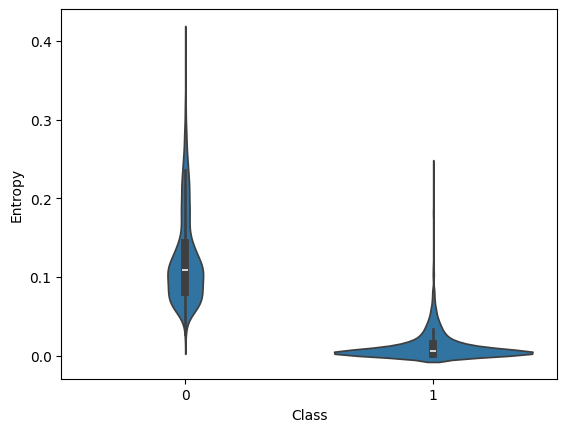

In [5]:
sns.violinplot(x = 'Class', y = 'Entropy',data = df)

**Graphical** **representation**


In [6]:
import seaborn as sns
#sns.pairplot(df)

In [7]:
corr_matrix = df.corr()
corr_matrix

,Class,Mean,Variance,Standard_Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
Class,1.000000,-0.095729,0.308818,0.285568,-0.778180,0.402644,0.239844,0.212643,-0.862413,-0.758255,-0.847529,0.556319,-0.108601,NaN
Mean,-0.095729,1.000000,0.783027,0.790984,-0.099729,-0.601593,-0.358163,-0.050974,-0.014863,-0.109393,0.095556,-0.113864,0.293693,NaN
Variance,0.308818,0.783027,1.000000,0.975699,-0.344432,-0.347399,-0.248312,0.135494,-0.335470,-0.341061,-0.290527,0.235487,0.288037,NaN
Standard_Deviation,0.285568,0.790984,0.975699,1.000000,-0.345127,-0.425428,-0.329798,0.117981,-0.331103,-0.342530,-0.288801,0.224773,0.354161,NaN
Entropy,-0.778180,-0.099729,-0.344432,-0.345127,1.000000,-0.222222,-0.140125,-0.140769,0.971260,0.999213,0.852019,-0.502363,0.122080,NaN
Skewness,0.402644,-0.601593,-0.347399,-0.425428,-0.222222,1.000000,0.899713,0.349856,-0.295413,-0.209289,-0.470054,0.511931,-0.570919,NaN
Kurtosis,0.239844,-0.358163,-0.248312,-0.329798,-0.140125,0.899713,1.000000,0.296664,-0.172454,-0.133741,-0.307314,0.375939,-0.589211,NaN
Contrast,0.212643,-0.050974,0.135494,0.117981,-0.140769,0.349856,0.296664,1.000000,-0.130708,-0.139276,-0.270119,0.761497,-0.427443,NaN
Energy,-0.862413,-0.014863,-0.335470,-0.331103,0.971260,-0.295413,-0.172454,-0.130708,1.000000,0.961628,0.915988,-0.545774,0.123680,NaN
ASM,-0.758255,-0.109393,-0.341061,-0.342530,0.999213,-0.209289,-0.133741,-0.139276,0.961628,1.000000,0.837139,-0.491813,0.121054,NaN


### **Correlation**

<Axes: >

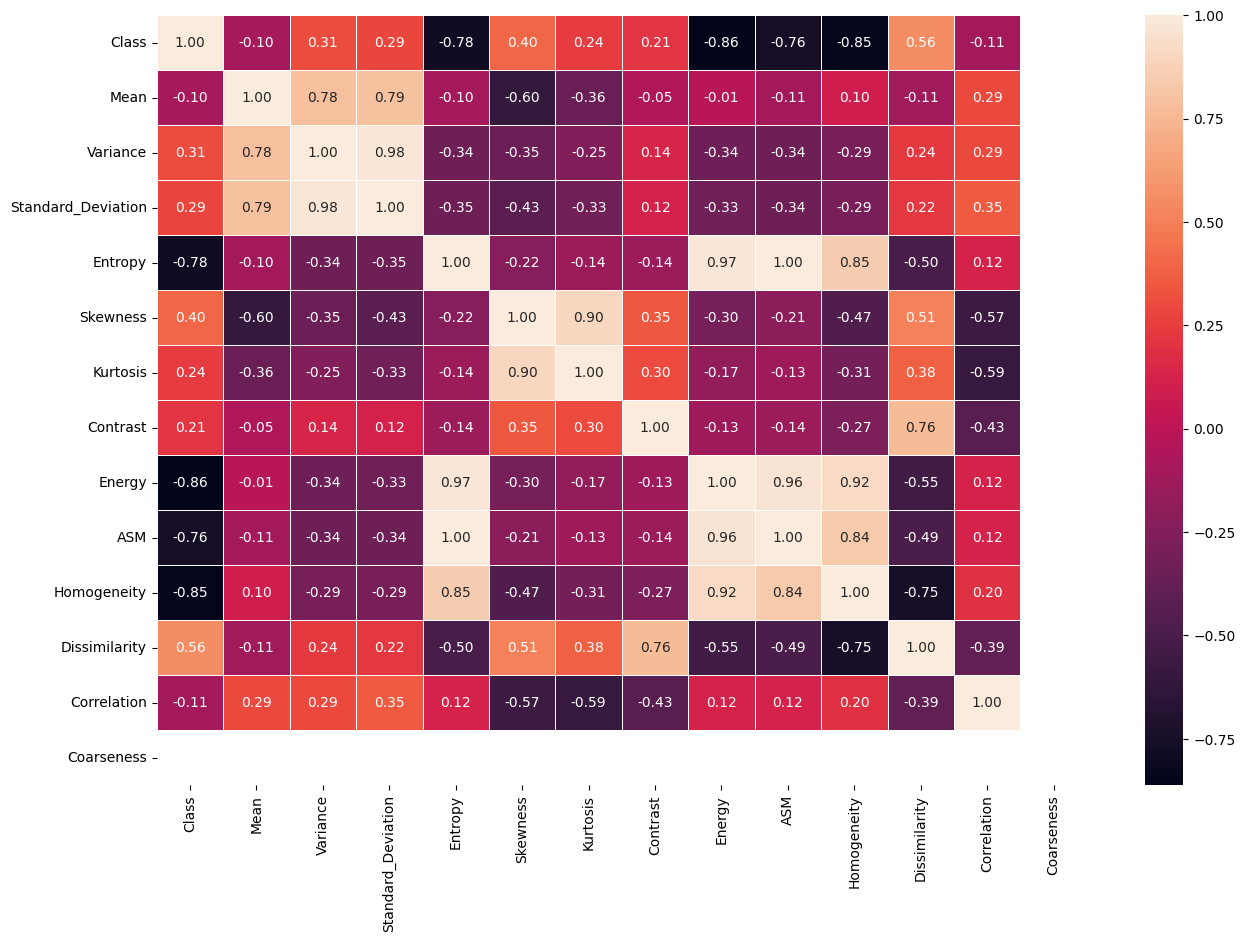

In [8]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr_matrix,
           annot=True,
           linewidths=0.5,
           fmt=".2f")

In [9]:
df.drop(['Mean',"Correlation","Coarseness"],axis=1,inplace=True)

In [10]:
df.head()

,Class,Variance,Standard_Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity
0,0,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346
1,0,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072
2,1,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800
3,1,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919
4,0,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689


In [11]:
df.isnull().sum()

Class                 0
Variance              0
Standard_Deviation    0
Entropy               0
Skewness              0
Kurtosis              0
Contrast              0
Energy                0
ASM                   0
Homogeneity           0
Dissimilarity         0
dtype: int64

# Standardisation

In [12]:

x = df.drop("Class",axis=1)
y = df["Class"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [13]:
x_test

,Variance,Standard_Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity
1553,1298.441768,36.033897,0.046960,3.243674,11.307747,194.259896,0.188121,0.035390,0.469286,4.905238
2987,45.131070,6.717966,0.231946,3.536554,12.983396,7.972747,0.438673,0.192434,0.761291,1.001703
220,724.512664,26.916773,0.062239,2.158160,4.882726,118.097000,0.217137,0.047148,0.555824,3.891556
2966,297.667929,17.253056,0.002242,6.396062,43.129299,114.208081,0.039488,0.001559,0.277165,6.804040
1971,341.897657,18.490475,0.131591,2.407934,6.171006,38.727931,0.323560,0.104691,0.640669,2.185241
...,...,...,...,...,...,...,...,...,...,...
1003,358.425327,18.932124,0.261107,3.545914,13.129127,57.262997,0.469524,0.220452,0.684817,2.312088
2928,852.205365,29.192557,0.001099,4.668365,23.382547,139.940058,0.027616,0.000763,0.291150,6.626218
2576,1022.546032,31.977274,0.092305,2.270377,5.453039,122.978773,0.268208,0.071936,0.551152,4.419348
612,644.392552,25.384888,0.091325,3.460520,12.429498,100.980952,0.266938,0.071256,0.485086,4.623593


Difference Between Before And After Scaling,Standardization

Text(0.5, 1.0, 'X_train After Scaling')

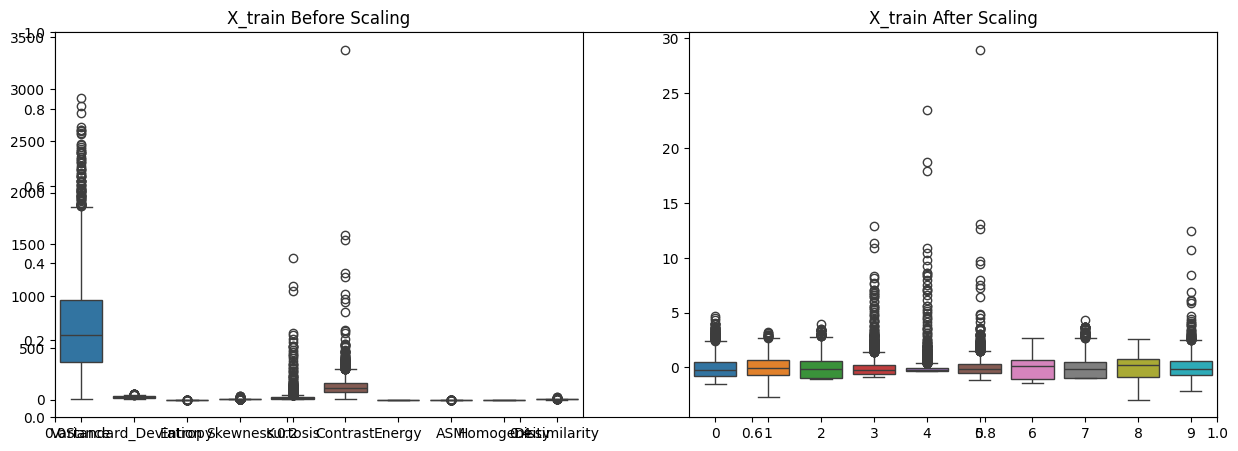

In [14]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=x_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=x_train_scaled)
plt.title('X_train After Scaling')

In [15]:
x_train = pd.DataFrame(x_train_scaled)
x_test = pd.DataFrame(x_test_scaled)

# **Linear Regression**

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

linreg=LinearRegression()
linreg.fit(x_train_scaled,y_train)
y_pred=linreg.predict(x_test_scaled)

mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("mean squared error",mean_squared_error(y_test,y_pred))
print("R2 Score", score)
print("root mean square error",np.sqrt(mean_squared_error(y_test,y_pred)))

for i in range(len(y_pred)):
  if y_pred[i] >= 0.5:
    y_pred[i] = 1
  else:
    y_pred[i] = 0

print(y_pred)

accuracy = accuracy_score(y_test,y_pred)*100
rounded_accuracy = round(accuracy, 1)
print(f'Accuracy linear regression : {rounded_accuracy} %')

Mean absolute error 0.12161148110033854
mean squared error 0.035123429280797806
R2 Score 0.8576929636211404
root mean square error 0.1874124576456907
[1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1.
 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1.
 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0.
 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1

## **Lasso** **regression**

In [17]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lasso=Lasso()
lasso.fit(x_train,y_train)
y_pred=lasso.predict(x_test)

mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("mean squared error",mean_squared_error(y_test,y_pred))
print("R2 Score", score)
print("root mean square error",np.sqrt(mean_squared_error(y_test,y_pred)))

for i in range(len(y_pred)):
  if y_pred[i] >= 0.5:
    y_pred[i] = 1
  else:
    y_pred[i] = 0

print(y_pred)

accuracy = accuracy_score(y_test,y_pred)*100
rounded_accuracy = round(accuracy, 1)
print(f'Accuracy linear regression : {rounded_accuracy} %')


Mean absolute error 0.4941664603356818
mean squared error 0.24683710686513077
R2 Score -9.190063660935444e-05
root mean square error 0.4968270391847959
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

## **Ridge** **regression**

In [18]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(x_train_scaled,y_train)
y_pred=ridge.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("mean squared error",mean_squared_error(y_test,y_pred))
print("R2 Score", score)
print("root mean square error",np.sqrt(mean_squared_error(y_test,y_pred)))

for i in range(len(y_pred)):
  if y_pred[i] >= 0.5:
    y_pred[i] = 1
  else:
    y_pred[i] = 0

print(y_pred)

accuracy = accuracy_score(y_test,y_pred)*100

rounded_accuracy = round(accuracy, 1)

print(f'Accuracy linear regression : {rounded_accuracy} %')

Mean absolute error 0.1278113149929196
mean squared error 0.03581159615224884
R2 Score 0.8549047681056232
root mean square error 0.18923952058766383
[1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1.
 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1.
 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0.
 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1.

## **ElasticNet** **regression**

In [19]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

elastic=ElasticNet()
elastic.fit(x_train_scaled,y_train)
y_pred=elastic.predict(x_test_scaled)

mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("mean squared error",mean_squared_error(y_test,y_pred))
print("R2 Score", score)
print("root mean square error",np.sqrt(mean_squared_error(y_test,y_pred)))

for i in range(len(y_pred)):
  if y_pred[i] >= 0.5:
    y_pred[i] = 1
  else:
    y_pred[i] = 0

print(y_pred)

accuracy = accuracy_score(y_test,y_pred)*100
rounded_accuracy = round(accuracy, 1)
print(f'Accuracy linear regression : {rounded_accuracy} %')

Mean absolute error 0.4941664603356818
mean squared error 0.24683710686513077
R2 Score -9.190063660935444e-05
root mean square error 0.4968270391847959
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

# **Logistic** **Regression**

[1 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1
 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1
 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0
 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 0
 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1
 0 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1 1 0
 0 1 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0
 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0
 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 1
 0 1 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0
 0 0 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 1 0 

<Axes: >

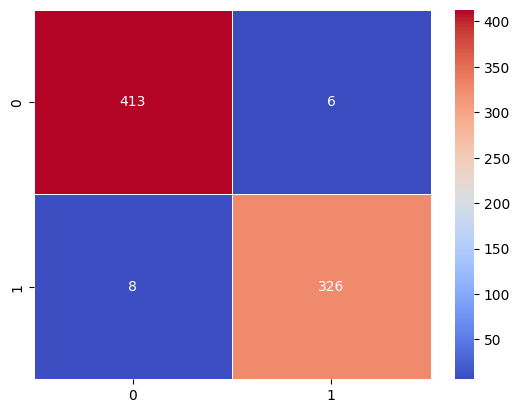

In [20]:
from sklearn.linear_model import LogisticRegression

logistic=LogisticRegression(random_state=42,C=25)
logistic.fit(x_train,y_train)
y_pred1=logistic.predict(x_test)

print(y_pred1)

accuracy = accuracy_score(y_test,y_pred1)*100
rounded_accuracy = round(accuracy, 1)
print(f'Accuracy logistic regression: {rounded_accuracy} %')

print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
precision = precision_score(y_test,y_pred1)
print(f'Precision logistic regression: {precision}')
recall = recall_score(y_test,y_pred1)
print(f'Recall logistic regression: {recall}')
f1 = f1_score(y_test,y_pred1)
print(f'F1 score logistic regression: {f1}')
f2=fbeta_score(y_test,y_pred1,beta=2)
print(f'F2 score logistic regression: {f2}')

sns.heatmap(confusion_matrix(y_test,y_pred1),cmap='coolwarm',annot=True,linewidths=0.5,fmt=".0f")

##Grid Search CV


0.9827357237715804
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       419
           1       0.98      0.98      0.98       334

    accuracy                           0.98       753
   macro avg       0.98      0.98      0.98       753
weighted avg       0.98      0.98      0.98       753

[[414   5]
 [  8 326]]
Accuracy logistic regression: 98.3 %
Precision logistic regression: 0.9848942598187311
Recall logistic regression: 0.9760479041916168
F1 score logistic regression: 0.9804511278195489
F2 score logistic regression: 0.9778044391121775
{'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}


d:\vit study\self preparation\machine learning\Brain Tumor Detection System\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
200 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "d:\vit study\self preparation\machine learning\Brain Tumor Detection System\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\vit study\self preparation\machine learning\Brain Tumor Detection System\.venv\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwar

<Axes: >

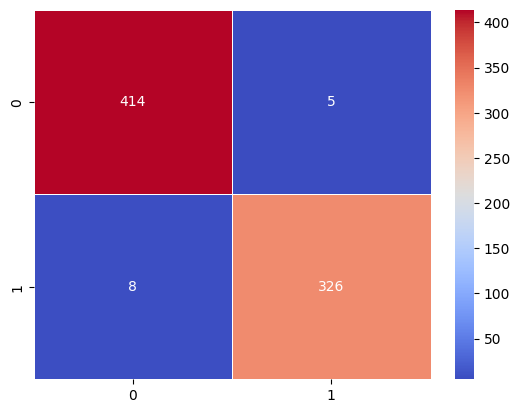

In [21]:

from sklearn.linear_model import LogisticRegression

model=LogisticRegression(random_state=42,C=25)
penalty=['l1', 'l2', 'elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
params=dict(penalty=penalty,C=c_values,solver=solver)

from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()
from sklearn.model_selection import GridSearchCV

grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)

grid.fit(x_train,y_train)
y_pred2=grid.predict(x_test)

score=accuracy_score(y_test,y_pred2)
print(score)
print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
accuracy = accuracy_score(y_test,y_pred2)*100
rounded_accuracy = round(accuracy, 1)
print(f'Accuracy logistic regression: {rounded_accuracy} %')
precision = precision_score(y_test,y_pred2)
print(f'Precision logistic regression: {precision}')
recall = recall_score(y_test,y_pred2)
print(f'Recall logistic regression: {recall}')
f1 = f1_score(y_test,y_pred2)
print(f'F1 score logistic regression: {f1}')
f2=fbeta_score(y_test,y_pred2,beta=2)
print(f'F2 score logistic regression: {f2}')

print(grid.best_params_)
sns.heatmap(confusion_matrix(y_test,y_pred2),cmap='coolwarm',annot=True,linewidths=0.5,fmt=".0f")

##Randomised Search CV

d:\vit study\self preparation\machine learning\Brain Tumor Detection System\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\vit study\self preparation\machine learning\Brain Tumor Detection System\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\vit study\self preparation\machine learning\Brain Tumor Detection System\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\vit study\self preparation\machine learning\Brain Tumor Detection System\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\vit study\self preparation\machine learning\Brain Tumor D

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       419
           1       0.98      0.98      0.98       334

    accuracy                           0.98       753
   macro avg       0.98      0.98      0.98       753
weighted avg       0.98      0.98      0.98       753

[[414   5]
 [  8 326]]
Accuracy logistic regression: 98.3 %
Precision logistic regression: 0.9848942598187311
Recall logistic regression: 0.9760479041916168
F1 score logistic regression: 0.9804511278195489
F2 score logistic regression: 0.9778044391121775
{'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}


<Axes: >

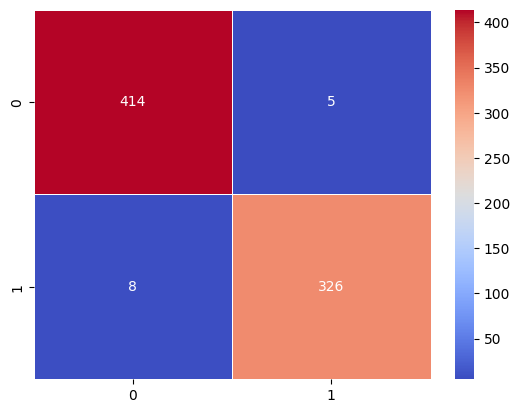

In [22]:

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,fbeta_score

model=LogisticRegression(random_state=42,C=25)
randomcv=RandomizedSearchCV(estimator=model,param_distributions=params,cv=5,scoring='accuracy')
randomcv.fit(x_train,y_train)
y_pred3=randomcv.predict(x_test)

print(classification_report(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

accuracy = accuracy_score(y_test,y_pred3)*100
rounded_accuracy = round(accuracy, 1)
print(f'Accuracy logistic regression: {rounded_accuracy} %')
precision = precision_score(y_test,y_pred3)
print(f'Precision logistic regression: {precision}')
recall = recall_score(y_test,y_pred3)
print(f'Recall logistic regression: {recall}')
f1 = f1_score(y_test,y_pred3)
print(f'F1 score logistic regression: {f1}')
f2=fbeta_score(y_test,y_pred3,beta=2)
print(f'F2 score logistic regression: {f2}')
print(grid.best_params_)

sns.heatmap(confusion_matrix(y_test,y_pred3),cmap='coolwarm',annot=True,linewidths=0.5,fmt=".0f")

# **SVC**


Accuracy logistic regression: 98.4 %
Precision logistic regression: 0.9878787878787879
Recall logistic regression: 0.9760479041916168
F1 score logistic regression: 0.9819277108433735
F2 score logistic regression: 0.978391356542617
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       419
           1       0.99      0.98      0.98       334

    accuracy                           0.98       753
   macro avg       0.98      0.98      0.98       753
weighted avg       0.98      0.98      0.98       753

[[415   4]
 [  8 326]]


<Axes: >

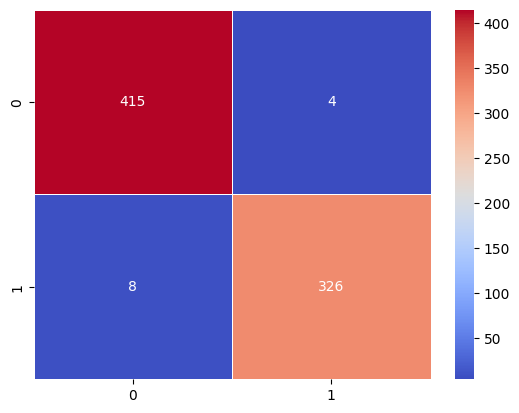

In [23]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')

svc.fit(x_train,y_train)
y_pred4=svc.predict(x_test)
accuracy = accuracy_score(y_test,y_pred4)*100
rounded_accuracy = round(accuracy, 1)
print(f'Accuracy logistic regression: {rounded_accuracy} %')

precision = precision_score(y_test,y_pred4)
print(f'Precision logistic regression: {precision}')
recall = recall_score(y_test,y_pred4)
print(f'Recall logistic regression: {recall}')
f1 = f1_score(y_test,y_pred4)
print(f'F1 score logistic regression: {f1}')
f2=fbeta_score(y_test,y_pred4,beta=2)
print(f'F2 score logistic regression: {f2}')

print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))


sns.heatmap(confusion_matrix(y_test,y_pred4),cmap='coolwarm',annot=True,linewidths=0.5,fmt=".0f")

Accuracy logistic regression: 97.7 %
Precision logistic regression: 0.9788519637462235
Recall logistic regression: 0.9700598802395209
F1 score logistic regression: 0.9744360902255639
F2 score logistic regression: 0.9718056388722256
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       419
           1       0.98      0.97      0.97       334

    accuracy                           0.98       753
   macro avg       0.98      0.98      0.98       753
weighted avg       0.98      0.98      0.98       753

[[412   7]
 [ 10 324]]


<Axes: >

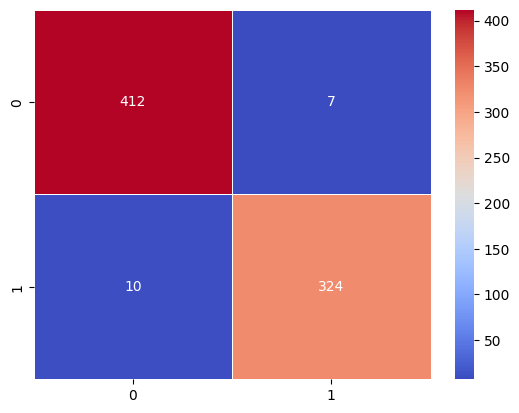

In [24]:
rbf=SVC(kernel='rbf')
rbf.fit(x_train,y_train)
y_pred5=rbf.predict(x_test)
accuracy = accuracy_score(y_test,y_pred5)*100
rounded_accuracy = round(accuracy, 1)
print(f'Accuracy logistic regression: {rounded_accuracy} %')

precision = precision_score(y_test,y_pred5)
print(f'Precision logistic regression: {precision}')
recall = recall_score(y_test,y_pred5)
print(f'Recall logistic regression: {recall}')
f1 = f1_score(y_test,y_pred5)
print(f'F1 score logistic regression: {f1}')
f2=fbeta_score(y_test,y_pred5,beta=2)
print(f'F2 score logistic regression: {f2}')
print(classification_report(y_test,y_pred5))
print(confusion_matrix(y_test,y_pred5))
sns.heatmap(confusion_matrix(y_test,y_pred5),cmap='coolwarm',annot=True,linewidths=0.5,fmt=".0f")

Accuracy logistic regression: 95.9 %
Precision logistic regression: 0.9967213114754099
Recall logistic regression: 0.9101796407185628
F1 score logistic regression: 0.9514866979655712
F2 score logistic regression: 0.9262644728823888
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       419
           1       1.00      0.91      0.95       334

    accuracy                           0.96       753
   macro avg       0.96      0.95      0.96       753
weighted avg       0.96      0.96      0.96       753

[[418   1]
 [ 30 304]]


<Axes: >

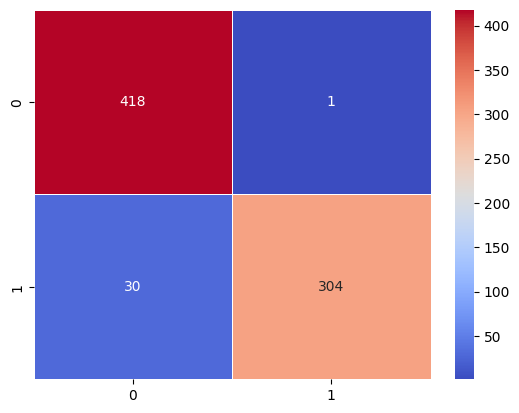

In [25]:
polynomial=SVC(kernel='poly')
polynomial.fit(x_train,y_train)
## Prediction
y_pred6=polynomial.predict(x_test)
accuracy = accuracy_score(y_test,y_pred6)*100
rounded_accuracy = round(accuracy, 1)
print(f'Accuracy logistic regression: {rounded_accuracy} %')

precision = precision_score(y_test,y_pred6)
print(f'Precision logistic regression: {precision}')
recall = recall_score(y_test,y_pred6)
print(f'Recall logistic regression: {recall}')
f1 = f1_score(y_test,y_pred6)
print(f'F1 score logistic regression: {f1}')
f2=fbeta_score(y_test,y_pred6,beta=2)
print(f'F2 score logistic regression: {f2}')
print(classification_report(y_test,y_pred6))
print(confusion_matrix(y_test,y_pred6))
sns.heatmap(confusion_matrix(y_test,y_pred6),cmap='coolwarm',annot=True,linewidths=0.5,fmt=".0f")

Accuracy logistic regression: 94.7 %
Precision logistic regression: 0.948170731707317
Recall logistic regression: 0.9311377245508982
F1 score logistic regression: 0.9395770392749244
F2 score logistic regression: 0.9344951923076923
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       419
           1       0.95      0.93      0.94       334

    accuracy                           0.95       753
   macro avg       0.95      0.95      0.95       753
weighted avg       0.95      0.95      0.95       753

[[402  17]
 [ 23 311]]


<Axes: >

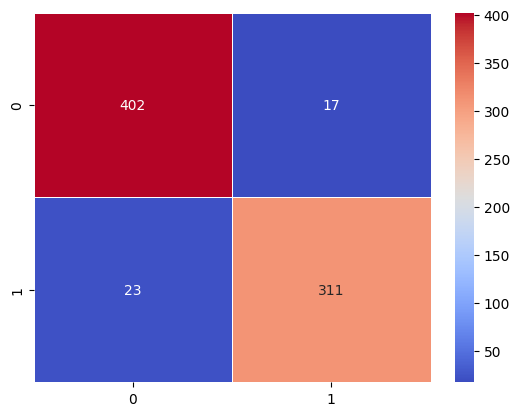

In [26]:
sigmoid=SVC(kernel='sigmoid')
sigmoid.fit(x_train,y_train)

y_pred7=sigmoid.predict(x_test)
accuracy = accuracy_score(y_test,y_pred7)*100
rounded_accuracy = round(accuracy, 1)
print(f'Accuracy logistic regression: {rounded_accuracy} %')

precision = precision_score(y_test,y_pred7)
print(f'Precision logistic regression: {precision}')
recall = recall_score(y_test,y_pred7)
print(f'Recall logistic regression: {recall}')
f1 = f1_score(y_test,y_pred7)
print(f'F1 score logistic regression: {f1}')
f2=fbeta_score(y_test,y_pred7,beta=2)
print(f'F2 score logistic regression: {f2}')
print(classification_report(y_test,y_pred7))
print(confusion_matrix(y_test,y_pred7))
sns.heatmap(confusion_matrix(y_test,y_pred7),cmap='coolwarm',annot=True,linewidths=0.5,fmt=".0f")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.983 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.972 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.977 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.980 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.987 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.975 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.968 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.982 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.980 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.982 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.963 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

<Axes: >

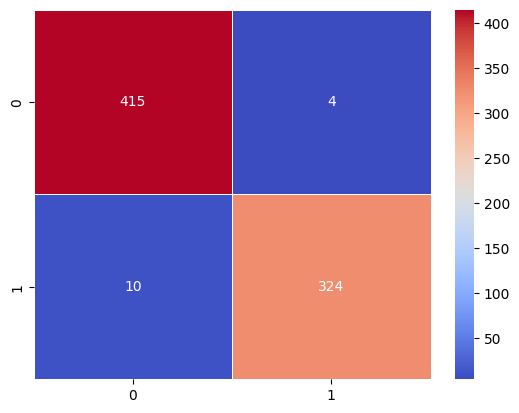

In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf']}
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)
grid.fit(x_train,y_train)
y_pred8=grid.predict(x_test)
print(grid.best_params_)
accuracy = accuracy_score(y_test,y_pred8)*100
rounded_accuracy = round(accuracy, 1)
print(f'Accuracy logistic regression: {rounded_accuracy} %')

precision = precision_score(y_test,y_pred8)
print(f'Precision logistic regression: {precision}')
recall = recall_score(y_test,y_pred8)
print(f'Recall logistic regression: {recall}')
f1 = f1_score(y_test,y_pred8)
print(f'F1 score logistic regression: {f1}')
f2=fbeta_score(y_test,y_pred8,beta=2)
print(f'F2 score logistic regression: {f2}')

print(classification_report(y_test,y_pred8))
print(confusion_matrix(y_test,y_pred8))
sns.heatmap(confusion_matrix(y_test,y_pred8),cmap='coolwarm',annot=True,linewidths=0.5,fmt=".0f")

 ## Naive Bayes

Accuracy logistic regression: 96.4 %
Precision logistic regression: 0.9781931464174455
Recall logistic regression: 0.9401197604790419
F1 score logistic regression: 0.9587786259541985
F2 score logistic regression: 0.9474954737477369
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       419
           1       0.98      0.94      0.96       334

    accuracy                           0.96       753
   macro avg       0.97      0.96      0.96       753
weighted avg       0.96      0.96      0.96       753

[[412   7]
 [ 20 314]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       419
           1       0.98      0.94      0.96       334

    accuracy                           0.96       753
   macro avg       0.97      0.96      0.96       753
weighted avg       0.96      0.96      0.96       753



<Axes: >

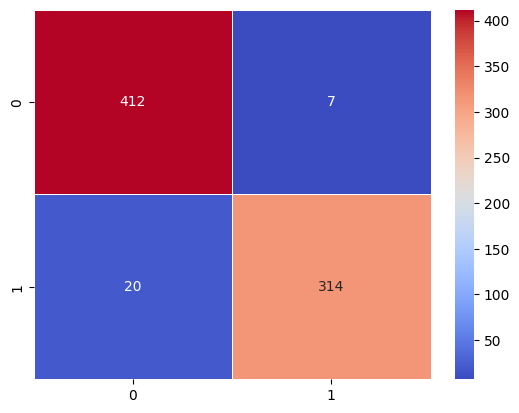

In [28]:

from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred9=gnb.predict(x_test)
accuracy = accuracy_score(y_test,y_pred9)*100
rounded_accuracy = round(accuracy, 1)
print(f'Accuracy logistic regression: {rounded_accuracy} %')

precision = precision_score(y_test,y_pred9)
print(f'Precision logistic regression: {precision}')
recall = recall_score(y_test,y_pred9)
print(f'Recall logistic regression: {recall}')
f1 = f1_score(y_test,y_pred9)
print(f'F1 score logistic regression: {f1}')
f2=fbeta_score(y_test,y_pred9,beta=2)
print(f'F2 score logistic regression: {f2}')
print(classification_report(y_test,y_pred9))
print(confusion_matrix(y_test,y_pred9))
print(classification_report(y_test,y_pred9))
sns.heatmap(confusion_matrix(y_test,y_pred9),cmap='coolwarm',annot=True,linewidths=0.5,fmt=".0f")

# **KNN**

Accuracy logistic regression: 98.3 %
Precision logistic regression: 0.9938461538461538
Recall logistic regression: 0.9670658682634731
F1 score logistic regression: 0.9802731411229135
F2 score logistic regression: 0.9723058398555088
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       419
           1       0.99      0.97      0.98       334

    accuracy                           0.98       753
   macro avg       0.98      0.98      0.98       753
weighted avg       0.98      0.98      0.98       753

[[417   2]
 [ 11 323]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       419
           1       0.99      0.97      0.98       334

    accuracy                           0.98       753
   macro avg       0.98      0.98      0.98       753
weighted avg       0.98      0.98      0.98       753



<Axes: >

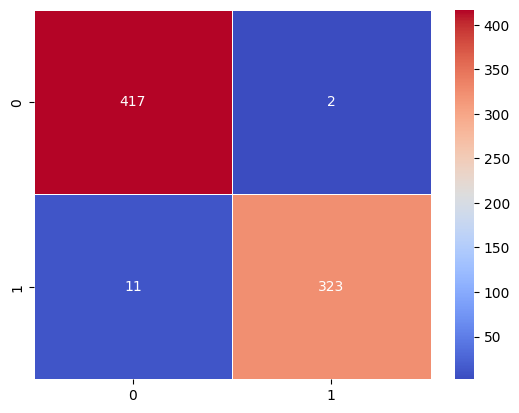

In [29]:

from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,algorithm='auto',p=2)   # p=2 means euclid method and it is default
classifier.fit(x_train,y_train)
y_pred10=classifier.predict(x_test)
accuracy = accuracy_score(y_test,y_pred10)*100
rounded_accuracy = round(accuracy, 1)
print(f'Accuracy logistic regression: {rounded_accuracy} %')

precision = precision_score(y_test,y_pred10)
print(f'Precision logistic regression: {precision}')
recall = recall_score(y_test,y_pred10)
print(f'Recall logistic regression: {recall}')
f1 = f1_score(y_test,y_pred10)
print(f'F1 score logistic regression: {f1}')
f2=fbeta_score(y_test,y_pred10,beta=2)
print(f'F2 score logistic regression: {f2}')
print(classification_report(y_test,y_pred10))
print(confusion_matrix(y_test,y_pred10))
print(classification_report(y_test,y_pred10))
sns.heatmap(confusion_matrix(y_test,y_pred10),cmap='coolwarm',annot=True,linewidths=0.5,fmt=".0f")

Accuracy logistic regression: 98.1 %
Precision logistic regression: 0.99079754601227
Recall logistic regression: 0.9670658682634731
F1 score logistic regression: 0.9787878787878788
F2 score logistic regression: 0.9717208182912154
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       419
           1       0.99      0.97      0.98       334

    accuracy                           0.98       753
   macro avg       0.98      0.98      0.98       753
weighted avg       0.98      0.98      0.98       753

[[416   3]
 [ 11 323]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       419
           1       0.99      0.97      0.98       334

    accuracy                           0.98       753
   macro avg       0.98      0.98      0.98       753
weighted avg       0.98      0.98      0.98       753



<Axes: >

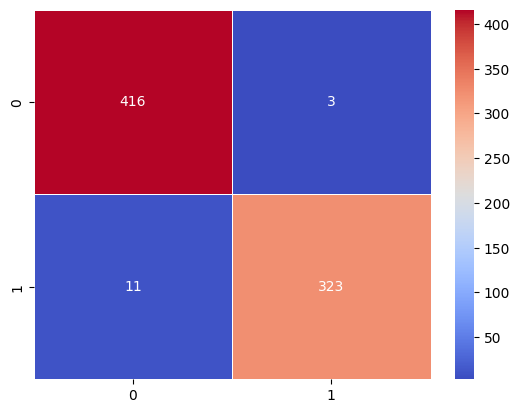

In [30]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,algorithm='auto',p=1)   # p=1 means manhatten
classifier.fit(x_train,y_train)
y_pred11=classifier.predict(x_test)
accuracy = accuracy_score(y_test,y_pred11)*100
rounded_accuracy = round(accuracy, 1)
print(f'Accuracy logistic regression: {rounded_accuracy} %')

precision = precision_score(y_test,y_pred11)
print(f'Precision logistic regression: {precision}')
recall = recall_score(y_test,y_pred11)
print(f'Recall logistic regression: {recall}')
f1 = f1_score(y_test,y_pred11)
print(f'F1 score logistic regression: {f1}')
f2=fbeta_score(y_test,y_pred11,beta=2)
print(f'F2 score logistic regression: {f2}')
print(classification_report(y_test,y_pred11))
print(confusion_matrix(y_test,y_pred11))
print(classification_report(y_test,y_pred11))
sns.heatmap(confusion_matrix(y_test,y_pred11),cmap='coolwarm',annot=True,linewidths=0.5,fmt=".0f")

Accuracy logistic regression: 97.6 %
Precision logistic regression: 0.9787878787878788
Recall logistic regression: 0.9670658682634731
F1 score logistic regression: 0.9728915662650602
F2 score logistic regression: 0.9693877551020408
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       419
           1       0.98      0.97      0.97       334

    accuracy                           0.98       753
   macro avg       0.98      0.98      0.98       753
weighted avg       0.98      0.98      0.98       753

[[412   7]
 [ 11 323]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       419
           1       0.98      0.97      0.97       334

    accuracy                           0.98       753
   macro avg       0.98      0.98      0.98       753
weighted avg       0.98      0.98      0.98       753



[Text(0.33035714285714285, 0.9666666666666667, 'x[2] <= -0.313\ngini = 0.495\nsamples = 3009\nvalue = [1660, 1349]'),
 Text(0.14652014652014653, 0.9, 'x[4] <= -0.334\ngini = 0.023\nsamples = 1313\nvalue = [15.0, 1298.0]'),
 Text(0.23843864468864467, 0.9333333333333333, 'True  '),
 Text(0.08791208791208792, 0.8333333333333334, 'x[0] <= 1.052\ngini = 0.491\nsamples = 23\nvalue = [13.0, 10.0]'),
 Text(0.05860805860805861, 0.7666666666666667, 'x[7] <= -0.749\ngini = 0.133\nsamples = 14\nvalue = [13, 1]'),
 Text(0.029304029304029304, 0.7, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.08791208791208792, 0.7, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.11721611721611722, 0.7666666666666667, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.20512820512820512, 0.8333333333333334, 'x[4] <= -0.331\ngini = 0.003\nsamples = 1290\nvalue = [2, 1288]'),
 Text(0.17582417582417584, 0.7666666666666667, 'x[0] <= 0.267\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.1465201465201465

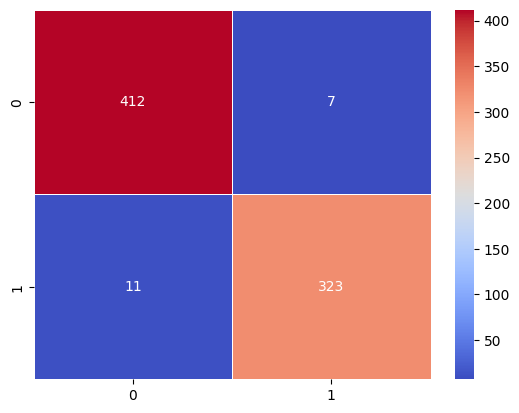

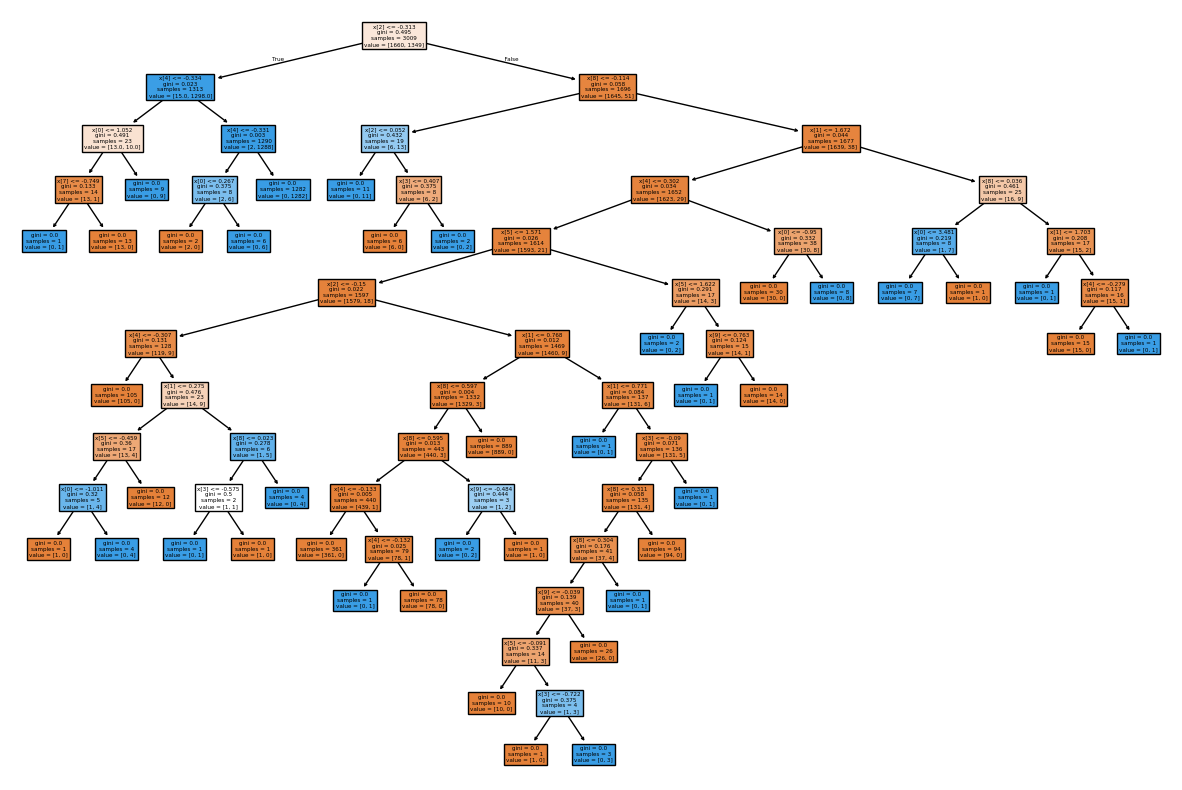

In [31]:
from sklearn.tree import DecisionTreeClassifier
treeclassifier=DecisionTreeClassifier()

treeclassifier.fit(x_train,y_train)
y_pred12=treeclassifier.predict(x_test)

accuracy = accuracy_score(y_test,y_pred12)*100
rounded_accuracy = round(accuracy, 1)
print(f'Accuracy logistic regression: {rounded_accuracy} %')

precision = precision_score(y_test,y_pred12)
print(f'Precision logistic regression: {precision}')
recall = recall_score(y_test,y_pred12)
print(f'Recall logistic regression: {recall}')
f1 = f1_score(y_test,y_pred12)
print(f'F1 score logistic regression: {f1}')
f2=fbeta_score(y_test,y_pred12,beta=2)
print(f'F2 score logistic regression: {f2}')
print(classification_report(y_test,y_pred12))
print(confusion_matrix(y_test,y_pred12))
print(classification_report(y_test,y_pred12))
sns.heatmap(confusion_matrix(y_test,y_pred12),cmap='coolwarm',annot=True,linewidths=0.5,fmt=".0f")


from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True)




Hyperparameter ttuning for for decision tree


{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'splitter': 'best'}
Accuracy logistic regression: 97.6 %
Precision logistic regression: 0.9787878787878788
Recall logistic regression: 0.9670658682634731
F1 score logistic regression: 0.9728915662650602
F2 score logistic regression: 0.9693877551020408
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       419
           1       0.98      0.97      0.97       334

    accuracy                           0.98       753
   macro avg       0.98      0.98      0.98       753
weighted avg       0.98      0.98      0.98       753

[[412   7]
 [ 11 323]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       419
           1       0.98      0.97      0.97       334

    accuracy                           0.98       753
   macro avg       0.98      0.98      0.98       753
weighted avg       0.98      0.98      0.98       753



<Axes: >

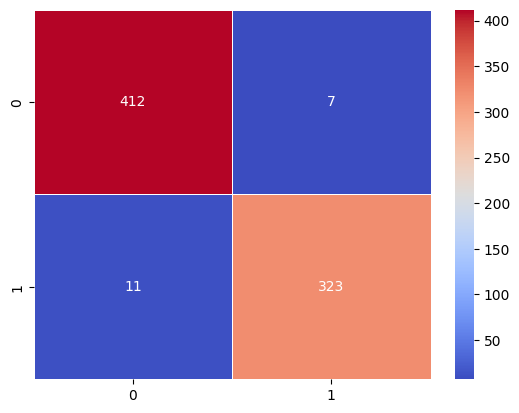

In [32]:
param={
    'criterion':['gini','entropy', 'log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}
grid=GridSearchCV(treeclassifier,param_grid=param,cv=5,scoring='accuracy')
import warnings
warnings.filterwarnings('ignore')
grid.fit(x_train,y_train)
print(grid.best_params_)
y_pred13=grid.predict(x_test)

accuracy = accuracy_score(y_test,y_pred12)*100
rounded_accuracy = round(accuracy, 1)
print(f'Accuracy logistic regression: {rounded_accuracy} %')

precision = precision_score(y_test,y_pred12)
print(f'Precision logistic regression: {precision}')
recall = recall_score(y_test,y_pred12)
print(f'Recall logistic regression: {recall}')
f1 = f1_score(y_test,y_pred12)
print(f'F1 score logistic regression: {f1}')
f2=fbeta_score(y_test,y_pred12,beta=2)
print(f'F2 score logistic regression: {f2}')
print(classification_report(y_test,y_pred12))
print(confusion_matrix(y_test,y_pred12))
print(classification_report(y_test,y_pred12))
sns.heatmap(confusion_matrix(y_test,y_pred12),cmap='coolwarm',annot=True,linewidths=0.5,fmt=".0f")


##Randomforest classifier


0.9840637450199203
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       419
           1       0.99      0.97      0.98       334

    accuracy                           0.98       753
   macro avg       0.99      0.98      0.98       753
weighted avg       0.98      0.98      0.98       753

[[417   2]
 [ 10 324]]
Accuracy random forest evaluation: 98.4 %
Precision random forest evaluation: 0.9938650306748467
Recall random forest evaluation: 0.9700598802395209
F1 score random forest evaluation: 0.9818181818181818
F2 score random forest evaluation: 0.9747292418772563


<Axes: >

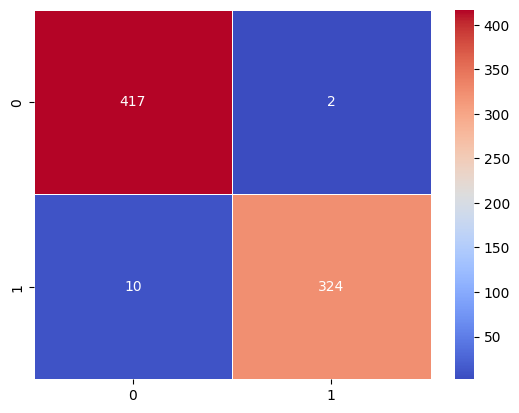

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Drop non-relevant columns
features = df.drop(["Class"], axis = 1)
target = df["Class"]

# Train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(x_train, y_train)

# Make predictions
y_pred12 = rf_model.predict(x_test)

# Evaluate the model
score=accuracy_score(y_test,y_pred12)
print(score)
print(classification_report(y_test,y_pred12))
print(confusion_matrix(y_test,y_pred12))
accuracy = accuracy_score(y_test,y_pred12)*100
rounded_accuracy = round(accuracy, 1)
print(f'Accuracy random forest evaluation: {rounded_accuracy} %')
precision = precision_score(y_test,y_pred12)
print(f'Precision random forest evaluation: {precision}')
recall = recall_score(y_test,y_pred12)
print(f'Recall random forest evaluation: {recall}')
f1 = f1_score(y_test,y_pred12)
print(f'F1 score random forest evaluation: {f1}')
f2=fbeta_score(y_test,y_pred12,beta=2)
print(f'F2 score random forest evaluation: {f2}')

sns.heatmap(confusion_matrix(y_test,y_pred12),cmap='coolwarm',annot=True,linewidths=0.5,fmt=".0f")

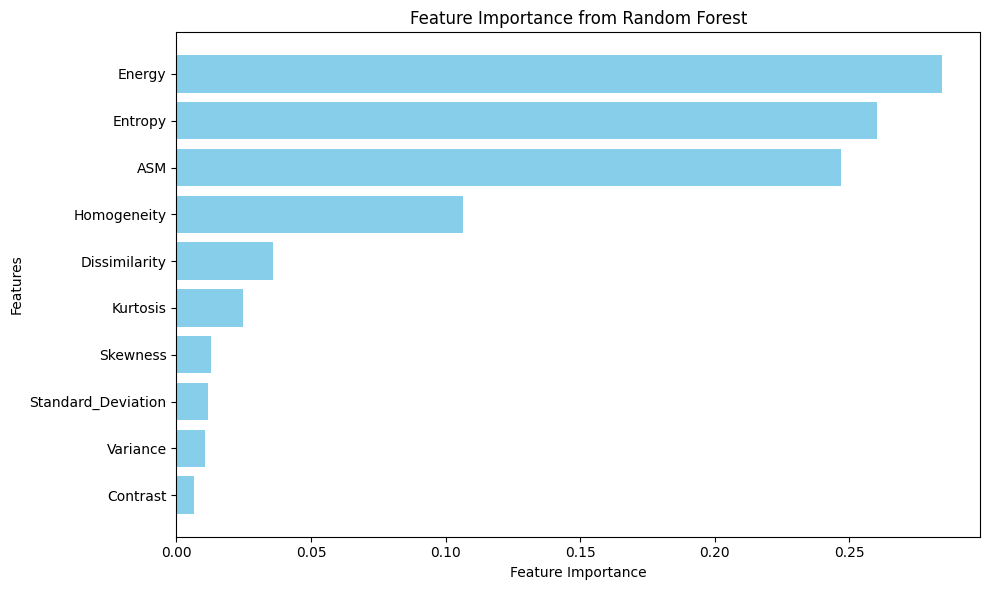

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Extract feature importances
feature_importances = rf_model.feature_importances_
feature_names = features.columns

# Sort features by importance
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_features = feature_names[sorted_idx]
sorted_importances = feature_importances[sorted_idx]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance from Random Forest")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


Hyperparameter tuning in Random Forest 

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 100, 'min_samples_split': 2, 'max_features': 5, 'max_depth': None}
Accuracy logistic regression: 98.5 %
Precision logistic regression: 0.9969230769230769
Recall logistic regression: 0.9700598802395209
F1 score logistic regression: 0.9833080424886191
F2 score logistic regression: 0.975316074653823
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       419
           1       1.00      0.97      0.98       334

    accuracy                           0.99       753
   macro avg       0.99      0.98      0.99       753
weighted avg       0.99      0.99      0.99       753

[[418   1]
 [ 10 324]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       419
           1       1.00      0.97      0.98       334

    accuracy                           0.99       753
   macro avg       0.99      0.98      0.99       753


<Axes: >

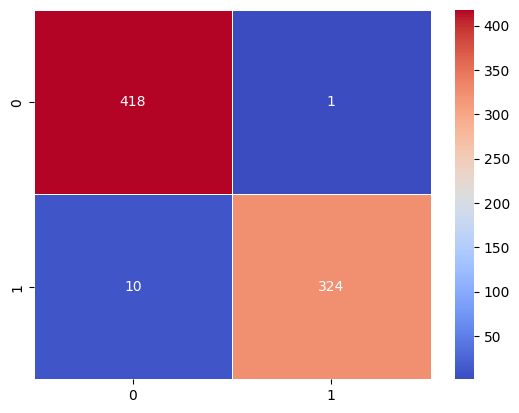

In [ ]:
## Hyperparameter Training
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}
from sklearn.model_selection import RandomizedSearchCV

random=RandomizedSearchCV(estimator=rf_model,
                                   param_distributions=rf_params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
import warnings
warnings.filterwarnings('ignore')
random.fit(x_train,y_train)
print(random.best_params_)
y_pred14=random.predict(x_test)

accuracy = accuracy_score(y_test,y_pred14)*100
rounded_accuracy = round(accuracy, 1)
print(f'Accuracy logistic regression: {rounded_accuracy} %')

precision = precision_score(y_test,y_pred14)
print(f'Precision logistic regression: {precision}')
recall = recall_score(y_test,y_pred14)
print(f'Recall logistic regression: {recall}')
f1 = f1_score(y_test,y_pred14)
print(f'F1 score logistic regression: {f1}')
f2=fbeta_score(y_test,y_pred14,beta=2)
print(f'F2 score logistic regression: {f2}')
print(classification_report(y_test,y_pred14))
print(confusion_matrix(y_test,y_pred14))
print(classification_report(y_test,y_pred14))
sns.heatmap(confusion_matrix(y_test,y_pred14),cmap='coolwarm',annot=True,linewidths=0.5,fmt=".0f")


AdaBoost classifier 


Accuracy logistic regression: 98.4 %
Precision logistic regression: 0.9908536585365854
Recall logistic regression: 0.9730538922155688
F1 score logistic regression: 0.9818731117824774
F2 score logistic regression: 0.9765625
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       419
           1       0.99      0.97      0.98       334

    accuracy                           0.98       753
   macro avg       0.98      0.98      0.98       753
weighted avg       0.98      0.98      0.98       753

[[416   3]
 [  9 325]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       419
           1       0.99      0.97      0.98       334

    accuracy                           0.98       753
   macro avg       0.98      0.98      0.98       753
weighted avg       0.98      0.98      0.98       753



<Axes: >

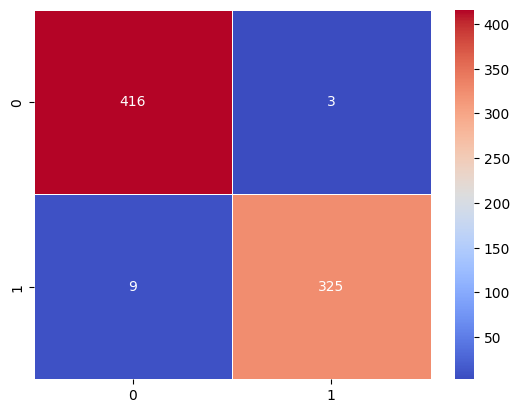

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()

ada.fit(x_train,y_train)
y_pred15=ada.predict(x_test)

accuracy = accuracy_score(y_test,y_pred15)*100
rounded_accuracy = round(accuracy, 1)
print(f'Accuracy logistic regression: {rounded_accuracy} %')

precision = precision_score(y_test,y_pred15)
print(f'Precision logistic regression: {precision}')
recall = recall_score(y_test,y_pred15)
print(f'Recall logistic regression: {recall}')
f1 = f1_score(y_test,y_pred15)
print(f'F1 score logistic regression: {f1}')
f2=fbeta_score(y_test,y_pred15,beta=2)
print(f'F2 score logistic regression: {f2}')
print(classification_report(y_test,y_pred15))
print(confusion_matrix(y_test,y_pred15))
print(classification_report(y_test,y_pred15))
sns.heatmap(confusion_matrix(y_test,y_pred15),cmap='coolwarm',annot=True,linewidths=0.5,fmt=".0f")







adaboost hyperparameter tuning 


Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'n_estimators': 80, 'algorithm': 'SAMME'}
Accuracy logistic regression: 98.4 %
Precision logistic regression: 0.9908536585365854
Recall logistic regression: 0.9730538922155688
F1 score logistic regression: 0.9818731117824774
F2 score logistic regression: 0.9765625
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       419
           1       0.99      0.97      0.98       334

    accuracy                           0.98       753
   macro avg       0.98      0.98      0.98       753
weighted avg       0.98      0.98      0.98       753

[[416   3]
 [  9 325]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       419
           1       0.99      0.97      0.98       334

    accuracy                           0.98       753
   macro avg       0.98      0.98      0.98       753
weighted avg       0.98      0.98      0.98       7

<Axes: >

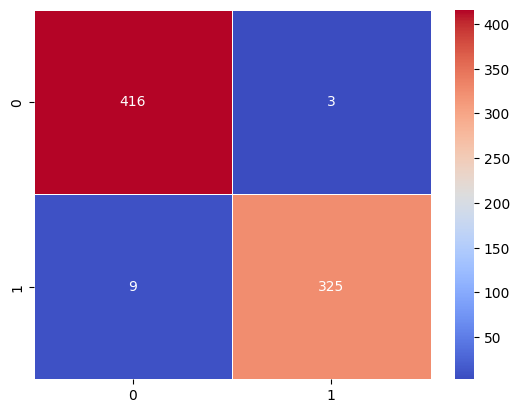

In [ ]:
## Hyperparameter Training
adaboost_param={
    "n_estimators":[50,60,70,80,90],
    "algorithm":['SAMME','SAMME.R']
}
from sklearn.model_selection import RandomizedSearchCV

random=RandomizedSearchCV(estimator=ada,
                                   param_distributions=adaboost_param,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
import warnings
warnings.filterwarnings('ignore')
random.fit(x_train,y_train)
print(random.best_params_)
y_pred16=random.predict(x_test)

accuracy = accuracy_score(y_test,y_pred16)*100
rounded_accuracy = round(accuracy, 1)
print(f'Accuracy logistic regression: {rounded_accuracy} %')

precision = precision_score(y_test,y_pred16)
print(f'Precision logistic regression: {precision}')
recall = recall_score(y_test,y_pred16)
print(f'Recall logistic regression: {recall}')
f1 = f1_score(y_test,y_pred16)
print(f'F1 score logistic regression: {f1}')
f2=fbeta_score(y_test,y_pred16,beta=2)
print(f'F2 score logistic regression: {f2}')
print(classification_report(y_test,y_pred16))
print(confusion_matrix(y_test,y_pred16))
print(classification_report(y_test,y_pred16))
sns.heatmap(confusion_matrix(y_test,y_pred16),cmap='coolwarm',annot=True,linewidths=0.5,fmt=".0f")


Gradient boosting 

Accuracy logistic regression: 98.1 %
Precision logistic regression: 0.99079754601227
Recall logistic regression: 0.9670658682634731
F1 score logistic regression: 0.9787878787878788
F2 score logistic regression: 0.9717208182912154
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       419
           1       0.99      0.97      0.98       334

    accuracy                           0.98       753
   macro avg       0.98      0.98      0.98       753
weighted avg       0.98      0.98      0.98       753

[[416   3]
 [ 11 323]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       419
           1       0.99      0.97      0.98       334

    accuracy                           0.98       753
   macro avg       0.98      0.98      0.98       753
weighted avg       0.98      0.98      0.98       753



<Axes: >

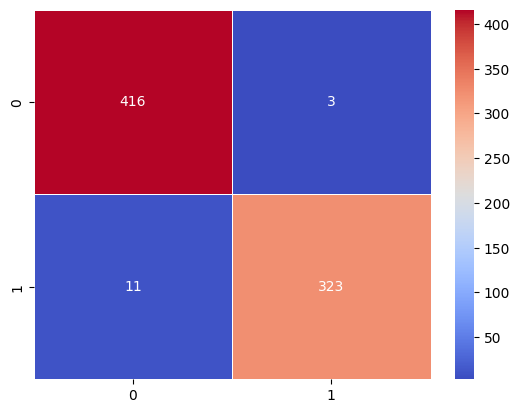

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()

gbc.fit(x_train,y_train)
y_pred17=gbc.predict(x_test)

accuracy = accuracy_score(y_test,y_pred17)*100
rounded_accuracy = round(accuracy, 1)
print(f'Accuracy logistic regression: {rounded_accuracy} %')

precision = precision_score(y_test,y_pred17)
print(f'Precision logistic regression: {precision}')
recall = recall_score(y_test,y_pred17)
print(f'Recall logistic regression: {recall}')
f1 = f1_score(y_test,y_pred17)
print(f'F1 score logistic regression: {f1}')
f2=fbeta_score(y_test,y_pred17,beta=2)
print(f'F2 score logistic regression: {f2}')
print(classification_report(y_test,y_pred17))
print(confusion_matrix(y_test,y_pred17))
print(classification_report(y_test,y_pred17))
sns.heatmap(confusion_matrix(y_test,y_pred17),cmap='coolwarm',annot=True,linewidths=0.5,fmt=".0f")







Hyperparameter tuning nof gradient boost 

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 500, 'min_samples_split': 8, 'max_depth': 5, 'loss': 'log_loss', 'criterion': 'friedman_mse'}
Accuracy logistic regression: 98.5 %
Precision logistic regression: 0.9938837920489296
Recall logistic regression: 0.9730538922155688
F1 score logistic regression: 0.983358547655068
F2 score logistic regression: 0.9771497294046904
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       419
           1       0.99      0.97      0.98       334

    accuracy                           0.99       753
   macro avg       0.99      0.98      0.99       753
weighted avg       0.99      0.99      0.99       753

[[417   2]
 [  9 325]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       419
           1       0.99      0.97      0.98       334

    accuracy                           0.99       753
   macro avg       0.99    

<Axes: >

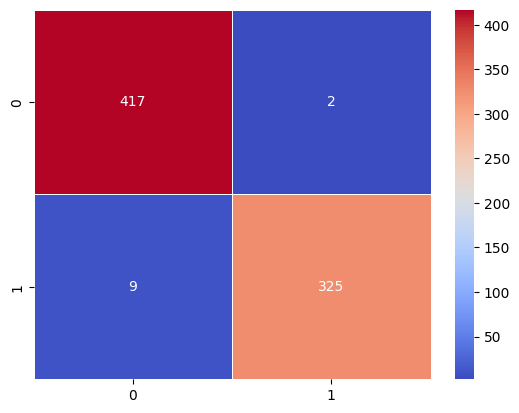

In [ ]:
## Hyperparameter Training
gradient_params={"loss": ['log_loss','deviance','exponential'],
             "criterion": ['friedman_mse','squared_error','mse'],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500],
              "max_depth": [5, 8, 15, None, 10]
                }
from sklearn.model_selection import RandomizedSearchCV

random=RandomizedSearchCV(estimator=gbc,
                                   param_distributions=gradient_params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
import warnings
warnings.filterwarnings('ignore')
random.fit(x_train,y_train)
print(random.best_params_)
y_pred18=random.predict(x_test)

accuracy = accuracy_score(y_test,y_pred18)*100
rounded_accuracy = round(accuracy, 1)
print(f'Accuracy logistic regression: {rounded_accuracy} %')

precision = precision_score(y_test,y_pred18)
print(f'Precision logistic regression: {precision}')
recall = recall_score(y_test,y_pred18)
print(f'Recall logistic regression: {recall}')
f1 = f1_score(y_test,y_pred18)
print(f'F1 score logistic regression: {f1}')
f2=fbeta_score(y_test,y_pred18,beta=2)
print(f'F2 score logistic regression: {f2}')
print(classification_report(y_test,y_pred18))
print(confusion_matrix(y_test,y_pred18))
print(classification_report(y_test,y_pred18))
sns.heatmap(confusion_matrix(y_test,y_pred18),cmap='coolwarm',annot=True,linewidths=0.5,fmt=".0f")


XGBoost

Accuracy logistic regression: 98.1 %
Precision logistic regression: 0.9848484848484849
Recall logistic regression: 0.9730538922155688
F1 score logistic regression: 0.9789156626506024
F2 score logistic regression: 0.975390156062425
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       419
           1       0.98      0.97      0.98       334

    accuracy                           0.98       753
   macro avg       0.98      0.98      0.98       753
weighted avg       0.98      0.98      0.98       753

[[414   5]
 [  9 325]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       419
           1       0.98      0.97      0.98       334

    accuracy                           0.98       753
   macro avg       0.98      0.98      0.98       753
weighted avg       0.98      0.98      0.98       753



<Axes: >

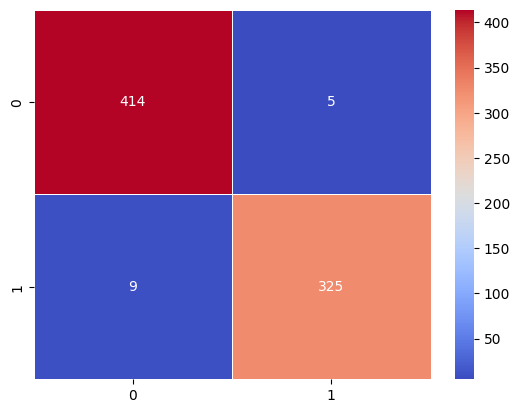

In [47]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

xgb.fit(x_train,y_train)
y_pred19=xgb.predict(x_test)

accuracy = accuracy_score(y_test,y_pred19)*100
rounded_accuracy = round(accuracy, 1)
print(f'Accuracy logistic regression: {rounded_accuracy} %')

precision = precision_score(y_test,y_pred19)
print(f'Precision logistic regression: {precision}')
recall = recall_score(y_test,y_pred19)
print(f'Recall logistic regression: {recall}')
f1 = f1_score(y_test,y_pred19)
print(f'F1 score logistic regression: {f1}')
f2=fbeta_score(y_test,y_pred19,beta=2)
print(f'F2 score logistic regression: {f2}')
print(classification_report(y_test,y_pred19))
print(confusion_matrix(y_test,y_pred19))
print(classification_report(y_test,y_pred19))
sns.heatmap(confusion_matrix(y_test,y_pred19),cmap='coolwarm',annot=True,linewidths=0.5,fmt=".0f")







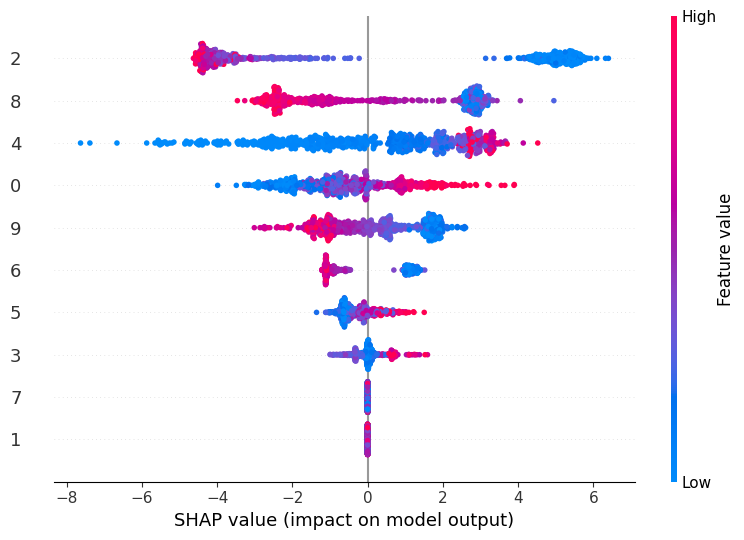

In [51]:
import shap
import matplotlib.pyplot as plt

# Load trained model (example: Random Forest)
model = xgb  

# Select a sample from your dataset
X_sample = x_test.iloc[:50]  # Taking first 50 samples

# Create SHAP explainer
explainer = shap.TreeExplainer(model)  # Works better for tree-based models
shap_values = explainer.shap_values(x_test)
feature_names = x_train.columns  # Get feature names from training data
shap.summary_plot(shap_values, x_test, feature_names=feature_names)

#shap.summary_plot(shap_values, x_test)



Hyper parameter tuning mof xgb 

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 200, 'max_depth': 12, 'learning_rate': 0.1, 'colsample_bytree': 1}
Accuracy logistic regression: 98.3 %
Precision logistic regression: 0.9878419452887538
Recall logistic regression: 0.9730538922155688
F1 score logistic regression: 0.9803921568627451
F2 score logistic regression: 0.975975975975976
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       419
           1       0.99      0.97      0.98       334

    accuracy                           0.98       753
   macro avg       0.98      0.98      0.98       753
weighted avg       0.98      0.98      0.98       753

[[415   4]
 [  9 325]]


<Axes: >

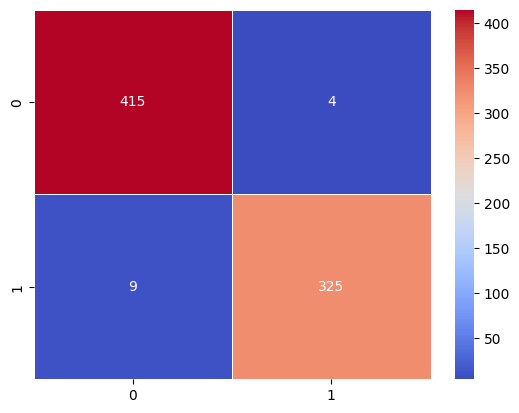

In [ ]:
## Hyperparameter Training
xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8, 12, 20, 30],
                  "n_estimators": [100, 200, 300],
                  "colsample_bytree": [0.5, 0.8, 1, 0.3, 0.4]
                  }
from sklearn.model_selection import RandomizedSearchCV

random=RandomizedSearchCV(estimator=xgb,
                                   param_distributions=xgboost_params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
import warnings
warnings.filterwarnings('ignore')
random.fit(x_train,y_train)
print(random.best_params_)
y_pred20=random.predict(x_test)

accuracy = accuracy_score(y_test,y_pred20)*100
rounded_accuracy = round(accuracy, 1)
print(f'Accuracy logistic regression: {rounded_accuracy} %')

precision = precision_score(y_test,y_pred20)
print(f'Precision logistic regression: {precision}')
recall = recall_score(y_test,y_pred20)
print(f'Recall logistic regression: {recall}')
f1 = f1_score(y_test,y_pred20)
print(f'F1 score logistic regression: {f1}')
f2=fbeta_score(y_test,y_pred20,beta=2)
print(f'F2 score logistic regression: {f2}')
print(classification_report(y_test,y_pred20))
print(confusion_matrix(y_test,y_pred20))
sns.heatmap(confusion_matrix(y_test,y_pred20),cmap='coolwarm',annot=True,linewidths=0.5,fmt=".0f")


Unsupervised Learning 

pca


Text(0, 0.5, 'Second Principal Component')

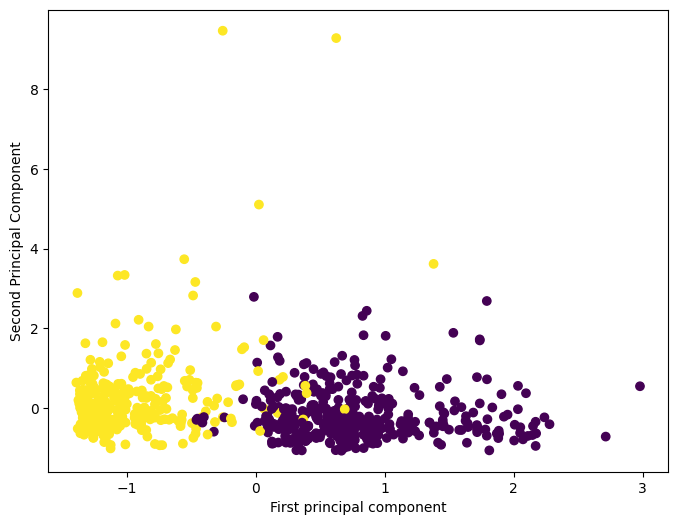

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

X_train_scaled=scaler.fit_transform(x_train)
X_test_scaled=scaler.transform(x_test)
data_pca=pca.fit(X_train_scaled)


plt.figure(figsize=(8,6))
plt.scatter(X_test_scaled[:,6],X_test_scaled[:,5],c=y_test)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')


Kmeans

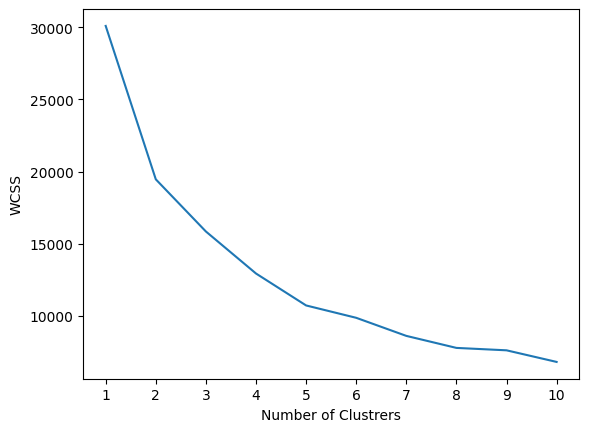

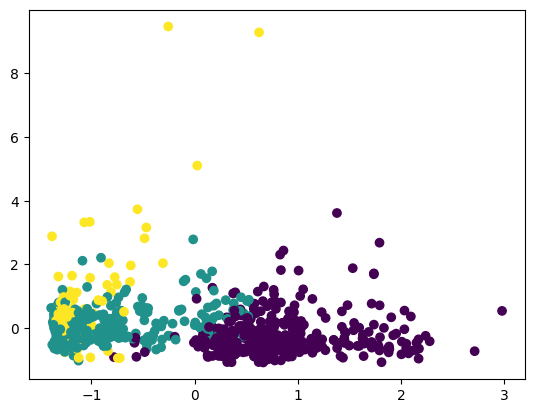

In [ ]:


X_train_scaled=scaler.fit_transform(x_train)
X_test_scaled=scaler.transform(x_test)
## Elbow method To select K Value
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

kmeans=KMeans(n_clusters=3,init="k-means++")
kmeans.fit_predict((X_train_scaled))
y_pred=kmeans.predict((X_test_scaled))
plt.scatter(X_test_scaled[:,6],X_test_scaled[:,5],c=y_pred)


heirarchical

Text(0, 0.5, 'Eucledian Distance')

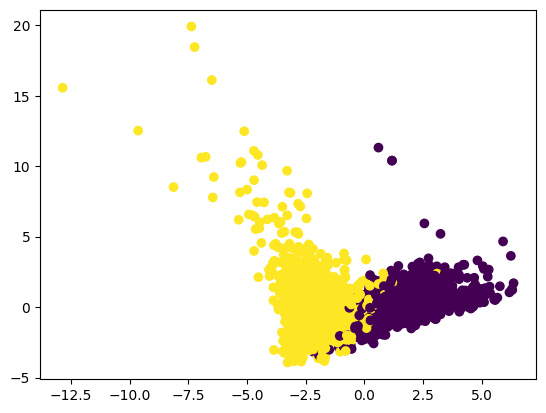

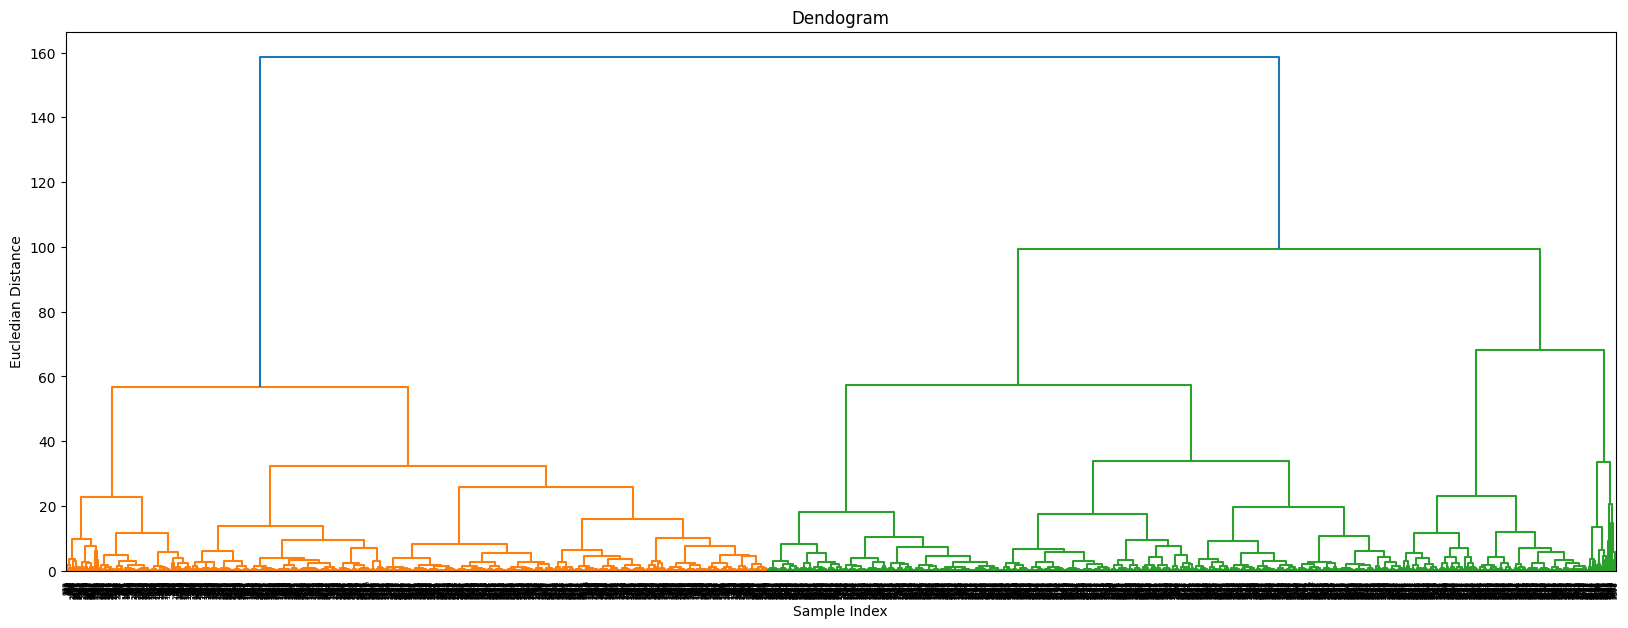

In [ ]:
## Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df=pd.DataFrame(x)
X_scaled=scaler.fit_transform(df)
pca_scaled=pca.fit_transform(X_scaled)
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=y)

import scipy.cluster.hierarchy as sc
##plot the dendogram
plt.figure(figsize=(20,7))
plt.title("Dendograms")

## create dendogram
sc.dendrogram(sc.linkage(pca_scaled,method='ward'))
plt.title('Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Eucledian Distance')

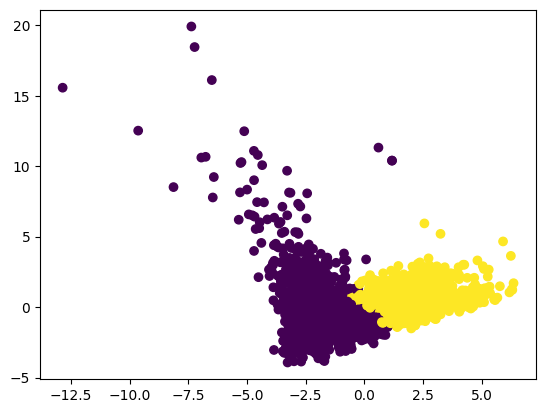

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,linkage='ward')
cluster.fit(pca_scaled)
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_)




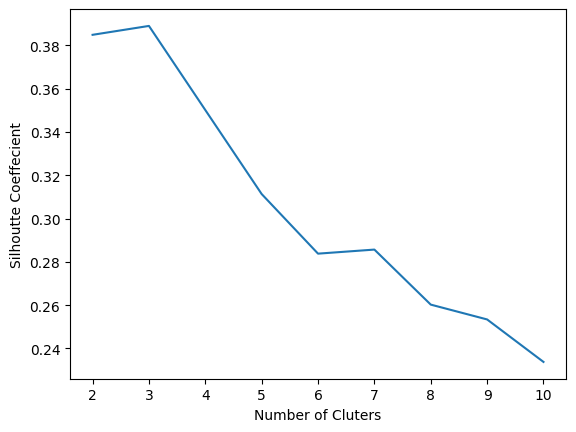

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    agglo = AgglomerativeClustering(n_clusters=k,linkage='ward')
    agglo.fit(X_scaled)
    score = silhouette_score(X_scaled, agglo.labels_)
    silhouette_coefficients.append(score)
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()

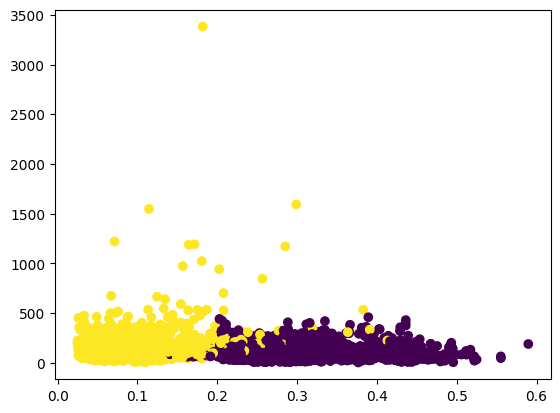

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df.iloc[:,6], df.iloc[:,5],c=y)

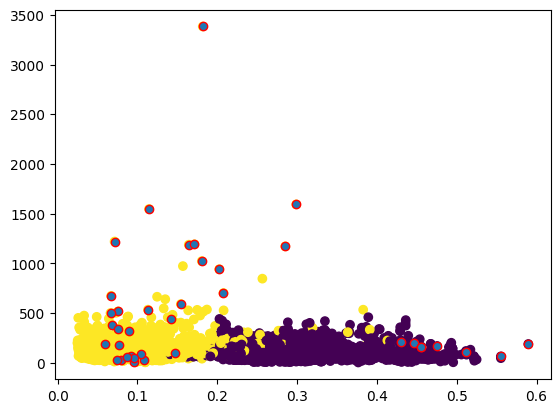

In [ ]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(contamination=0.01,random_state=42)
clf.fit(df)
predictions = clf.predict(df)
import numpy as np
index = np.where(predictions < 0)
index
x=df.values
index = np.where(predictions < 0)
plt.scatter(df.iloc[:,6], df.iloc[:,5],c=y)
plt.scatter(x[index,6], x[index,5], edgecolors="r")

In [52]:
import tensorflow 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
import datetime

model=Sequential([
    Dense(64,activation='relu',input_shape=(x_train.shape[1],)), ## HL1 Connected wwith input layer
    Dense(32,activation='relu'), ## HL2
    Dense(1,activation='sigmoid')  ## output layer
]

)
model.summary()



opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)
loss=tensorflow.keras.losses.BinaryCrossentropy()
model.compile(optimizer=opt,loss="binary_crossentropy",metrics=['accuracy'])

## Set up the Tensorboard
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard

log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback=TensorBoard(log_dir=log_dir,histogram_freq=1)

early_stopping_callback=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)


### Train the model
history=model.fit(
    x_train,y_train,validation_data=(x_test,y_test),epochs=100,
    callbacks=[tensorflow_callback,early_stopping_callback]
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9574 - loss: 0.1592 - val_accuracy: 0.9774 - val_loss: 0.0825
Epoch 2/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9705 - loss: 0.0957 - val_accuracy: 0.9801 - val_loss: 0.0661
Epoch 3/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9856 - loss: 0.0446 - val_accuracy: 0.9814 - val_loss: 0.0583
Epoch 4/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9827 - loss: 0.0478 - val_accuracy: 0.9801 - val_loss: 0.0608
Epoch 5/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9868 - loss: 0.0386 - val_accuracy: 0.9801 - val_loss: 0.0601
Epoch 6/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9833 - loss: 0.0399 - val_accuracy: 0.9801 - val_loss: 0.0552
Epoch 7/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9851 - loss: 0.0424 - val_accuracy: 0.9788 - val_loss: 0.0733
Epoch 8/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9878 - loss: 0.0364 - val_accuracy: 0.9788 - v

3200/3200 ━━━━━━━━━━━━━━━━━━━━ 2s 556us/step
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 2s 510us/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 2s 624us/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step


ExactExplainer explainer:   6%|▌         | 3/50 [00:00<?, ?it/s]

3200/3200 ━━━━━━━━━━━━━━━━━━━━ 2s 617us/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  10%|█         | 5/50 [00:13<01:03,  1.41s/it]

3200/3200 ━━━━━━━━━━━━━━━━━━━━ 2s 763us/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  12%|█▏        | 6/50 [00:17<01:35,  2.17s/it]

3200/3200 ━━━━━━━━━━━━━━━━━━━━ 2s 537us/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  14%|█▍        | 7/50 [00:19<01:37,  2.26s/it]

3200/3200 ━━━━━━━━━━━━━━━━━━━━ 2s 490us/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  16%|█▌        | 8/50 [00:21<01:34,  2.26s/it]

3200/3200 ━━━━━━━━━━━━━━━━━━━━ 2s 484us/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  18%|█▊        | 9/50 [00:24<01:32,  2.25s/it]

3200/3200 ━━━━━━━━━━━━━━━━━━━━ 2s 503us/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  20%|██        | 10/50 [00:26<01:30,  2.25s/it]

3200/3200 ━━━━━━━━━━━━━━━━━━━━ 2s 528us/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ExactExplainer explainer:  22%|██▏       | 11/50 [00:28<01:30,  2.33s/it]

3200/3200 ━━━━━━━━━━━━━━━━━━━━ 2s 577us/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step


ExactExplainer explainer:  24%|██▍       | 12/50 [00:31<01:32,  2.43s/it]

3200/3200 ━━━━━━━━━━━━━━━━━━━━ 2s 646us/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step


ExactExplainer explainer:  26%|██▌       | 13/50 [00:34<01:34,  2.54s/it]

3200/3200 ━━━━━━━━━━━━━━━━━━━━ 2s 499us/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  28%|██▊       | 14/50 [00:36<01:29,  2.49s/it]

3200/3200 ━━━━━━━━━━━━━━━━━━━━ 2s 611us/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  30%|███       | 15/50 [00:39<01:29,  2.56s/it]

3200/3200 ━━━━━━━━━━━━━━━━━━━━ 2s 525us/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  32%|███▏      | 16/50 [00:41<01:26,  2.55s/it]

3200/3200 ━━━━━━━━━━━━━━━━━━━━ 2s 492us/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  34%|███▍      | 17/50 [00:44<01:21,  2.46s/it]

3200/3200 ━━━━━━━━━━━━━━━━━━━━ 2s 513us/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  36%|███▌      | 18/50 [00:46<01:17,  2.43s/it]

3200/3200 ━━━━━━━━━━━━━━━━━━━━ 2s 564us/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step


ExactExplainer explainer:  38%|███▊      | 19/50 [00:49<01:17,  2.49s/it]

3200/3200 ━━━━━━━━━━━━━━━━━━━━ 2s 586us/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  40%|████      | 20/50 [00:51<01:16,  2.54s/it]

3200/3200 ━━━━━━━━━━━━━━━━━━━━ 2s 559us/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step


ExactExplainer explainer:  42%|████▏     | 21/50 [00:54<01:12,  2.52s/it]

3200/3200 ━━━━━━━━━━━━━━━━━━━━ 2s 710us/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  44%|████▍     | 22/50 [00:57<01:14,  2.66s/it]

3200/3200 ━━━━━━━━━━━━━━━━━━━━ 2s 721us/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  46%|████▌     | 23/50 [01:00<01:14,  2.77s/it]

3200/3200 ━━━━━━━━━━━━━━━━━━━━ 2s 634us/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  48%|████▊     | 24/50 [01:03<01:12,  2.79s/it]

3200/3200 ━━━━━━━━━━━━━━━━━━━━ 2s 527us/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  50%|█████     | 25/50 [01:05<01:07,  2.70s/it]

3200/3200 ━━━━━━━━━━━━━━━━━━━━ 2s 543us/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step


ExactExplainer explainer:  52%|█████▏    | 26/50 [01:08<01:02,  2.62s/it]

3200/3200 ━━━━━━━━━━━━━━━━━━━━ 2s 501us/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  54%|█████▍    | 27/50 [01:10<00:58,  2.54s/it]

3200/3200 ━━━━━━━━━━━━━━━━━━━━ 2s 618us/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  56%|█████▌    | 28/50 [01:13<00:57,  2.60s/it]

3200/3200 ━━━━━━━━━━━━━━━━━━━━ 2s 689us/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step


ExactExplainer explainer:  58%|█████▊    | 29/50 [01:16<00:56,  2.70s/it]

3200/3200 ━━━━━━━━━━━━━━━━━━━━ 2s 523us/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step


ExactExplainer explainer:  60%|██████    | 30/50 [01:18<00:52,  2.62s/it]

3200/3200 ━━━━━━━━━━━━━━━━━━━━ 2s 503us/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step


ExactExplainer explainer:  62%|██████▏   | 31/50 [01:20<00:48,  2.54s/it]

3200/3200 ━━━━━━━━━━━━━━━━━━━━ 2s 515us/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  64%|██████▍   | 32/50 [01:23<00:44,  2.48s/it]

3200/3200 ━━━━━━━━━━━━━━━━━━━━ 2s 510us/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  66%|██████▌   | 33/50 [01:25<00:41,  2.46s/it]

3200/3200 ━━━━━━━━━━━━━━━━━━━━ 2s 505us/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step


ExactExplainer explainer:  68%|██████▊   | 34/50 [01:27<00:38,  2.41s/it]

3200/3200 ━━━━━━━━━━━━━━━━━━━━ 1s 455us/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  70%|███████   | 35/50 [01:30<00:34,  2.33s/it]

3200/3200 ━━━━━━━━━━━━━━━━━━━━ 2s 471us/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  72%|███████▏  | 36/50 [01:32<00:31,  2.28s/it]

3200/3200 ━━━━━━━━━━━━━━━━━━━━ 1s 456us/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  74%|███████▍  | 37/50 [01:34<00:29,  2.24s/it]

3200/3200 ━━━━━━━━━━━━━━━━━━━━ 1s 454us/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  76%|███████▌  | 38/50 [01:36<00:26,  2.22s/it]

3200/3200 ━━━━━━━━━━━━━━━━━━━━ 2s 480us/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step


ExactExplainer explainer:  78%|███████▊  | 39/50 [01:38<00:24,  2.21s/it]

3200/3200 ━━━━━━━━━━━━━━━━━━━━ 2s 470us/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step


ExactExplainer explainer:  80%|████████  | 40/50 [01:40<00:21,  2.20s/it]

3200/3200 ━━━━━━━━━━━━━━━━━━━━ 1s 464us/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step


ExactExplainer explainer:  82%|████████▏ | 41/50 [01:43<00:19,  2.18s/it]

3200/3200 ━━━━━━━━━━━━━━━━━━━━ 2s 469us/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  84%|████████▍ | 42/50 [01:45<00:17,  2.17s/it]

3200/3200 ━━━━━━━━━━━━━━━━━━━━ 2s 470us/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  86%|████████▌ | 43/50 [01:47<00:15,  2.17s/it]

3200/3200 ━━━━━━━━━━━━━━━━━━━━ 2s 483us/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  88%|████████▊ | 44/50 [01:49<00:13,  2.18s/it]

3200/3200 ━━━━━━━━━━━━━━━━━━━━ 2s 478us/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  90%|█████████ | 45/50 [01:51<00:10,  2.19s/it]

3200/3200 ━━━━━━━━━━━━━━━━━━━━ 2s 510us/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  92%|█████████▏| 46/50 [01:54<00:08,  2.24s/it]

3200/3200 ━━━━━━━━━━━━━━━━━━━━ 2s 495us/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  94%|█████████▍| 47/50 [01:56<00:06,  2.24s/it]

3200/3200 ━━━━━━━━━━━━━━━━━━━━ 2s 579us/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step


ExactExplainer explainer:  96%|█████████▌| 48/50 [01:58<00:04,  2.33s/it]

3200/3200 ━━━━━━━━━━━━━━━━━━━━ 2s 533us/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step


ExactExplainer explainer:  98%|█████████▊| 49/50 [02:01<00:02,  2.35s/it]

3200/3200 ━━━━━━━━━━━━━━━━━━━━ 2s 522us/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer: 100%|██████████| 50/50 [02:03<00:00,  2.41s/it]

3200/3200 ━━━━━━━━━━━━━━━━━━━━ 3s 804us/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer: 51it [02:07,  2.65s/it]                        


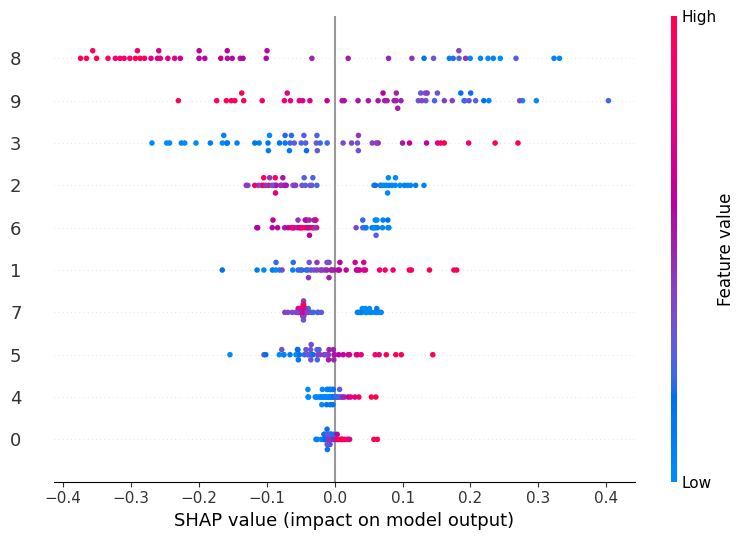

In [58]:
import shap
import numpy as np
X_test = np.array(x_test)  # Convert if it's not already in the right format

# Convert output to numpy array
def model_wrapper(X):
    return model.predict(X).astype(np.float64)  # Ensure it's an array

explainer = shap.Explainer(model_wrapper, x_train[:100])  # Use a subset of data
shap_values = explainer(x_test[:50])  # Compute SHAP for fewer samples

shap.summary_plot(shap_values, x_test[:50])



In [ ]:
## Define a function to create the model and try different parameters(KerasClassifier)
from sklearn.pipeline import Pipeline
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

def create_model(neurons=32,layers=1):
    model=Sequential()
    model.add(Dense(neurons,activation='relu',input_shape=(x_train.shape[1],)))

    for _ in range(layers-1):
        model.add(Dense(neurons,activation='relu'))

    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])

    return model

model=KerasClassifier(layers=1,neurons=32,build_fn=create_model,verbose=1)


# Define the grid search parameters
param_grid = {
    'neurons': [16, 32, 64, 128],
    'layers': [1, 2],
    'epochs': [50, 100]
}

# Perform grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3,verbose=1)
grid_result = grid.fit(x_train, y_train)

# Print the best parameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))





Fitting 3 folds for each of 16 candidates, totalling 48 fits


KeyboardInterrupt: 

In [ ]:
%load_ext tensorboard


In [ ]:
%tensorboard --logdir logs/fit/20250215-125944

In [ ]:
from flask import Flask,send_file,request,render_template
import io
app = Flask(__name__)
MODEL_DATA = {
    "Logistic": confusion_matrix(y_test,y_pred1),
    "Random Forest":confusion_matrix(y_test,y_pred12),
    "Logistic_grid_searchCV": confusion_matrix(y_test,y_pred2),
    "Logistic_random_searchCV": confusion_matrix(y_test,y_pred3),
    "SVC_linear": confusion_matrix(y_test,y_pred4),
    "SVC_rbf": confusion_matrix(y_test,y_pred5),
    "SVC_poly": confusion_matrix(y_test,y_pred6),
    "SVC_sigmoid": confusion_matrix(y_test,y_pred7),
    "SVC_grid_searchCV": confusion_matrix(y_test,y_pred8),
    "Naive_Bayes": confusion_matrix(y_test,y_pred9),
    "KNN": confusion_matrix(y_test,y_pred10),
    "KNN_p1": confusion_matrix(y_test,y_pred11),

}
@app.route('/')
def index():
    # Render a form to accept the model identifier
    return render_template("index.html", models=list(MODEL_DATA.keys()))

@app.route('/heatmap', methods=['GET'])
def heatmap():
    # Get the model identifier from the request
    model_id = request.args.get("model", None)
    if not model_id or model_id not in MODEL_DATA:
        return "Invalid model identifier. Please try again.", 400

    # Fetch the data for the selected model
    data = MODEL_DATA[model_id]

    # Generate the heatmap dynamically
    img = io.BytesIO()
    generate_heatmap(data, img)
    img.seek(0)
    return send_file(img, mimetype='image/png')

def generate_heatmap(data, output):
    sns.heatmap(data,cmap='coolwarm',annot=True,linewidths=0.5,fmt=".0f")
    plt.savefig(output, format='png')
    plt.close()

if __name__ == '__main__':
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
